In [4]:
import sys
if "..\.." not in sys.path:
    sys.path.append("..\..")
import clusterizer
import datetime



In [5]:
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Hogere DPI voor plotjes (is mooi)
%config InlineBackend.figure_format = 'retina'
# Standaard grootte van plotjes in inches
plt.rcParams['figure.figsize'] = [8, 5]

import pandas as pd
import numpy as np

In [6]:
circ = clusterizer.circuit.MergedCircuit(1353)
circ.build()




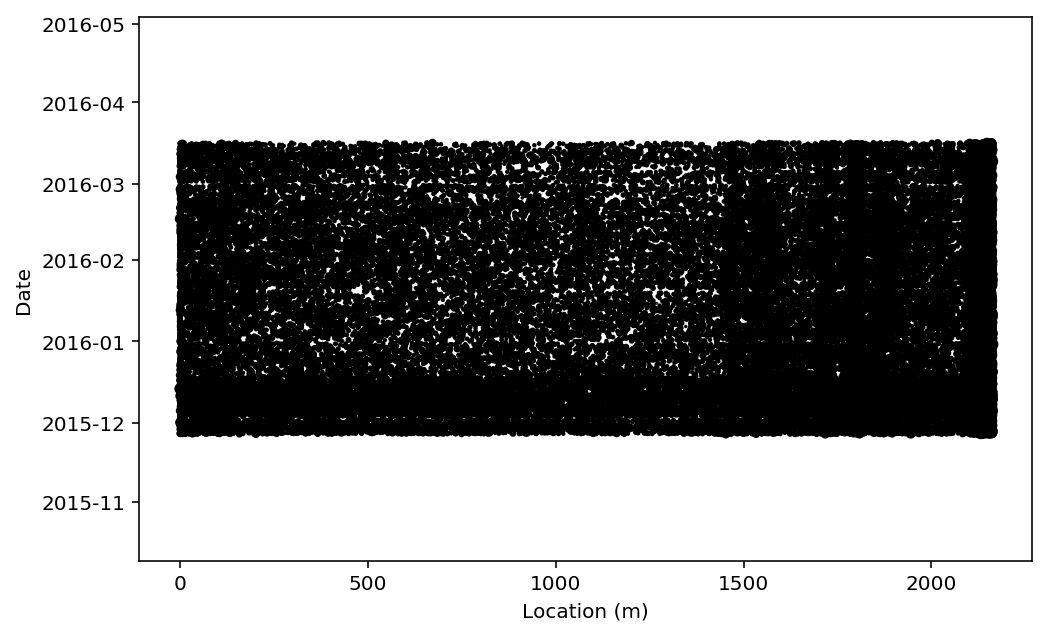

In [9]:
fig,ax = plt.subplots()
clusterizer.plot.draw_location_time_scatter(circ, ax=ax)
fig.savefig("scatter_{}_hoge_dichtheid.pdf".format(circ.circuitnr))

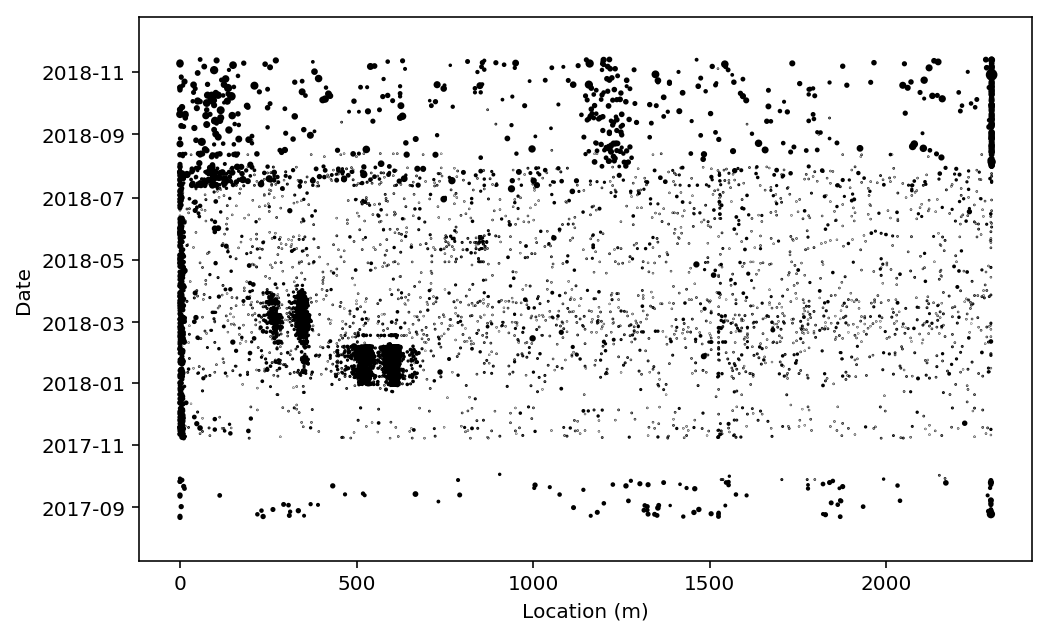

In [19]:
circ = clusterizer.circuit.MergedCircuit(2063)
circ.build()
clusterizer.plot.draw_location_time_scatter(circ)

In [22]:
def add_config(cableconfig):
    # Namen van de kolommen
    type_col, length_col, cum_length_col = cableconfig.columns

    rmu = cableconfig[cableconfig[type_col]=="RMU"]
    joints = cableconfig[ cableconfig[type_col].str.startswith("Joint") ]

    for joint_loc in joints[cum_length_col]:
        plt.axvline(x=joint_loc,color="red")
    for rmu_loc in rmu[cum_length_col]:
        plt.axvline(x=rmu_loc,color="blue")

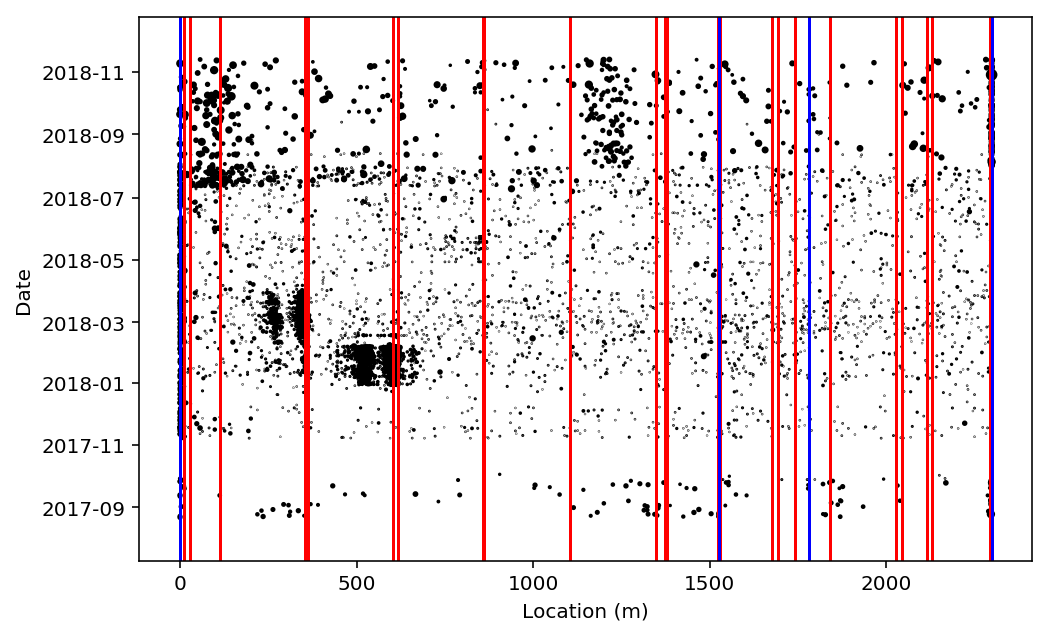

In [24]:
fig,ax = plt.subplots()
clusterizer.plot.draw_location_time_scatter(circ, ax=ax)
add_config(circ.cableconfig )
fig.savefig("scatter_{}_cableconfig.pdf".format(circ.circuitnr))